# Car or Driver - What wins a championship in Formula 1?

There's a common belief amongst nostalgic fans of F1 that, in a not-so-far past, everything was so beautiful in the category that a driver could win the Championship by brute force, that is, without the best cars. Nowadays, they say, any idiot with the best car is capable of winning. It's all on the machinery, so there isn't a balance between drivers anymore.

How much is that true? This data analysis is inspired by the Splash and Go F1 podcast's episode on the same topic, where F1 championships were evaluated by season, taking into account Drivers' and Constructors' standings. 

The dataset used covers the all seasons between 1950 and 2020, and is available under CC0 license on Kaggle, and can be found <a href="https://www.kaggle.com/datasets/deepshah16/formula-1-19502020">here</a>.

Let's start by loading both datasets and analysing their surface data using the pd.head() method.

In [1]:
import pandas as pd 

wcc = pd.read_csv("dataset/archive/ConstructorStandings.csv")

wcc.head()

,Unnamed: 0,Pos,Team,PTS,Year
0,0,1,Vanwall,48,1958
1,1,2,Ferrari,40,1958
2,2,3,Cooper Climax,31,1958
3,3,4,BRM,18,1958
4,4,5,Maserati,6,1958


Now, let's check who where the World Constructors Champions.

For that, we'll use the pd.DataFrame.loc() method, to assess the "Pos" column values that match "1" (considering also this column is using *str* data type).

And, in order to better concatenate the values later, we'll reset the index of this DataFrame.

In [2]:
wcc_champions = wcc.loc[wcc["Pos"] == "1"]

wcc_champions.reset_index(inplace=True)

wcc_champions

,index,Unnamed: 0,Pos,Team,PTS,Year
0,0,0,1,Vanwall,48,1958
1,6,6,1,Cooper Climax,40,1959
2,10,10,1,Cooper Climax,48,1960
3,16,16,1,Ferrari,40,1961
4,21,21,1,BRM,42,1962
...,...,...,...,...,...,...
58,603,603,1,Mercedes,765,2016
59,614,614,1,Mercedes,668,2017
60,624,624,1,Mercedes,655,2018
61,635,635,1,Mercedes,739,2019


Let's repeat the whole process now, for the World Drivers Championship.

In [3]:
wdc = pd.read_csv("dataset/archive/DriversStandings.csv")

wdc.head()

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
0,0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950
1,1,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950
2,2,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,1950
3,3,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,1950
4,4,5,Alberto Ascari ASC,ITA,Ferrari,11.0,1950


This time, we'll also use the pd.DataFrame.query() method, another pratical solution for the same objective of assessing the World Drivers Champions of each year. This time, we'll include another condition: only the WDC post-1958 (since this was the first season when the WCC was ever held) will be accounted in this new DataFrame. For the sake of this analysis, the pre-WCC era will not be accounted.

In [4]:
wdc_champions = wdc.query("Pos == '1' & Year >= 1958")

wdc_champions.reset_index(inplace = True)

wdc_champions

,index,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
0,182,182,1,Mike Hawthorn HAW,GBR,Ferrari,42.0,1958
1,203,203,1,Jack Brabham BRA,AUS,Cooper Climax,31.0,1959
2,222,222,1,Jack Brabham BRA,AUS,Cooper Climax,43.0,1960
3,249,249,1,Phil Hill HIL,USA,Ferrari,34.0,1961
4,266,266,1,Graham Hill HIL,GBR,BRM,42.0,1962
...,...,...,...,...,...,...,...,...
58,1465,1465,1,Nico Rosberg ROS,GER,Mercedes,385.0,2016
59,1489,1489,1,Lewis Hamilton HAM,GBR,Mercedes,363.0,2017
60,1512,1512,1,Lewis Hamilton HAM,GBR,Mercedes,408.0,2018
61,1532,1532,1,Lewis Hamilton HAM,GBR,Mercedes,413.0,2019


Now, let's make a DataFrame with the WDC Champion's team, and the WCC champion, to compare the best driver and best car of each year.

In [5]:
best_car_vs_driver = pd.DataFrame({"WCC Team": wcc_champions["Team"], "WDC Team": wdc_champions["Car"], "Season": wcc_champions["Year"]})
best_car_vs_driver

,WCC Team,WDC Team,Season
0,Vanwall,Ferrari,1958
1,Cooper Climax,Cooper Climax,1959
2,Cooper Climax,Cooper Climax,1960
3,Ferrari,Ferrari,1961
4,BRM,BRM,1962
...,...,...,...
58,Mercedes,Mercedes,2016
59,Mercedes,Mercedes,2017
60,Mercedes,Mercedes,2018
61,Mercedes,Mercedes,2019


Now, the $1 billion dollar question: was always the winning car the winning driver?

In [6]:
best_car_vs_driver.loc[best_car_vs_driver["WCC Team"] != best_car_vs_driver["WDC Team"]].reset_index()

,index,WCC Team,WDC Team,Season
0,0,Vanwall,Ferrari,1958
1,15,Lotus Ford,Tyrrell Ford,1973
2,18,Ferrari,McLaren Ford,1976
3,23,Williams Ford,Brabham Ford,1981
4,24,Ferrari,Williams Ford,1982
5,25,Ferrari,Brabham BMW,1983
6,28,Williams Honda,McLaren TAG,1986
7,36,Williams Renault,Benetton Ford,1994
8,41,Ferrari,McLaren Mercedes,1999
9,50,Ferrari,McLaren Mercedes,2008


Out of all finished F1 seasons held between 1958 and 2020, the year of the introduction of the Constructors' Championship, there were only 10 seasons where the best car did not win both championships.

In other words, where the best driver did not had the best car. So, we can see the nostalgic claim "any idiot with the best car wins nowadays, the past championships were so much better and more balanced" is actually false. The best car wins in almost all seasons, which is not only very predictable (you don't need any Python skills to figure that out), but is also provable through the data. 

But, that aside, let's answer: **why** did the best car lose these specific championships of 2008, '99, '94, '86, '83 to '81 (three in a row!), '76, '73 and '58?

Just looking at these plain numbers, a fanatic F1 fan could answer at the top of the head the reason for half of these. But let's ask our datasets one more time, starting by the year 2008.

## 2008 Season

2007, '08 and '09 are very important years for the category. '09 was the introduction of a highly anticipated new set of regulations, which not only saw the dominance of Brawn GP, the phoenix brought back from the ashes of the old Honda team with its mighty double diffuser, but also the rise of a new F1 household name: Red Bull Racing. That said, it's expected that '08 was a very balanced year, since the teams were already changing their focus for the next season.

And we're not forgeting '07's infamous Spygate, when Mclaren was found guilty of using leaked Ferrari intelectual property, which caused its disqualification of that year's WCC. FIA planned to make a review of the new '08 car at the end of that year, but it was eventually dismissed. So... those cars were, literally, very similar.

Let's see who the WD and WC champion and runner-up where, respectively.

In [7]:
wdc.query("Year == 2008 & Pos in ('1', '2')")

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
1271,1271,1,Lewis Hamilton HAM,GBR,McLaren Mercedes,98.0,2008
1272,1272,2,Felipe Massa MAS,BRA,Ferrari,97.0,2008


In [8]:
wcc.query("Year == 2008 & Pos in ('1', '2')")

,Unnamed: 0,Pos,Team,PTS,Year
514,514,1,Ferrari,172,2008
515,515,2,McLaren Mercedes,151,2008


So, we can see that the WDC dispute was very tight, and it was decided in the last Grand Prix, in the last lap, in the last corner (for the despair of all the Brazilian crowd at Interlagos that afternoon). As of the WCC, things were a little bit more easy for Ferrari - a 21-point advantage over Mclaren, who took the Driver's crown. 

Let's check the performance of both teams' drivers that year.

In [9]:
drivers_08 = wdc.query("Year == 2008 and Car in ('Ferrari', 'McLaren Mercedes')")

drivers_08

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
1271,1271,1,Lewis Hamilton HAM,GBR,McLaren Mercedes,98.0,2008
1272,1272,2,Felipe Massa MAS,BRA,Ferrari,97.0,2008
1273,1273,3,Kimi Räikkönen RAI,FIN,Ferrari,75.0,2008
1277,1277,7,Heikki Kovalainen KOV,FIN,McLaren Mercedes,53.0,2008


Let's use another Python tool to visualize that: **Matplotlib and bar charts!**

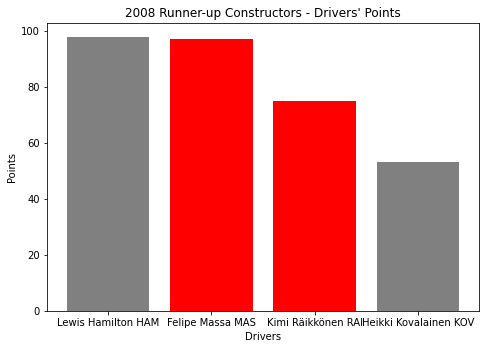

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(drivers_08["Driver"], drivers_08["PTS"], color=["grey", "red", "red", "grey"])
ax.set_title("2008 Runner-up Constructors - Drivers' Points")
plt.xlabel("Drivers")
plt.ylabel("Points")
plt.show()

So, we can see that what actually happened is that Ferrari had a more balanced duo over Mclaren's. KOV was in his second full F1 season, and he left Mclaren after the terrible year they had in 2009, in the first season with the new regulations. 

As of Ferrari, both their drivers were title contenders in both '07 and '08, and in the previous year, RAI won the WDC, since the team gave him the upper hand on strategies. The next year, the same was done for MAS, but a series of errors and bad luck, specially in the Singapore, Hungarian and Brazilian GP's — the latter being one of MAS's career most brilliant perfomances — saw the title slip away.

## The '99 Season

The last season before the new millenium (and before a streak of Ferrari dominance) saw another fight between '98 runner-up teams: Ferrari and Mclaren (yet again, the Prancing Horse of Maranello and Woking's machineries dogfighting against each other). This time, however, different players: Ferrari's Michael Schumacher and Mclaren's Mika Hakkinen. But in '99, Schumacher's teammate, Eddie Irvine, was Ferrari's top-fighter for the title.

Let's see on the queries how much they scored.

In [11]:
drivers_99 = wdc.query("Car in ('McLaren Mercedes', 'Ferrari') & Year == 1999")

drivers_99

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
1064,1064,1,Mika Hakkinen HAK,FIN,McLaren Mercedes,76.0,1999
1065,1065,2,Eddie Irvine IRV,GBR,Ferrari,74.0,1999
1067,1067,4,David Coulthard COU,GBR,McLaren Mercedes,48.0,1999
1068,1068,5,Michael Schumacher MSC,GER,Ferrari,44.0,1999
1073,1073,10,Mika Salo SAL,FIN,Ferrari,10.0,1999


Strange: Ferrari had 3 drivers!? Yeah. Schumacher broke his leg at the British Grand Prix in an accident, and was replaced by Mika Salo until the last 2 rounds of the year. However, his contribuitions, including two podiums, helped Ferrari to take the crown.

Also, there was a third runner-up that had chances until the end of the season: Jordan's Heinz-Harald Frentzen, who was third in the championship.

Let's repeat the query and plot the bar chart, for comparision's sake.

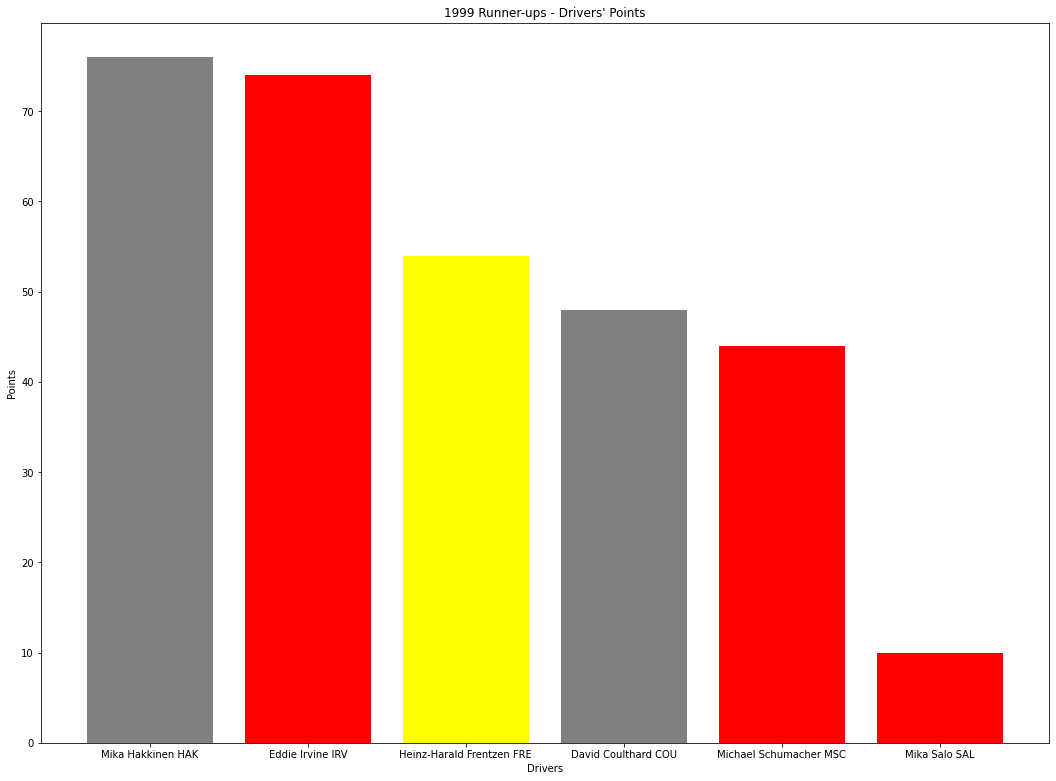

In [12]:
drivers_99 = wdc.query("(Car in ('McLaren Mercedes', 'Ferrari') | Pos == '3') & Year == 1999")

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.set_size_inches(14,10)
ax.bar(drivers_99["Driver"], drivers_99["PTS"], 
       color=["grey", "red", "yellow", "grey", "red", "red"])
ax.set_title("1999 Runner-ups - Drivers' Points")
plt.xlabel("Drivers")
plt.ylabel("Points")
plt.show()

Looking at the bar chart, we can see the year was very balanced overall between the teams, especially with the inclusion of Jordan's challenger to grab a few points from each. A very balanced season, yet unusual considering had Schumacher's injury not happened, things could have been different. And were indeed next season, when he took the first of 5 consecutive WDC titles.

## '94 Season

1994 had a new set of regulations introduced, which banned a series of electronic assistances that had led the Williams team to dominance, at a point that the legendary Ayrton Senna labeled them "cars from other planet". Yeah, Senna... 1994 was also the year that saw the death of the most memorable driver of the sport, at the San Marino Grand Prix. 

We can make a comparison between the Williams' dominance ('92 and '93) and the '94 season, on the drivers's standings. Let's make a query for that, selecting the 4 top-scores of each season, together with Matplotlib bar charts for better visualization.

In [13]:
williams = wdc.query("Pos in ('1', '2', '3', '4') & Year in (1992, 1993, 1994)")

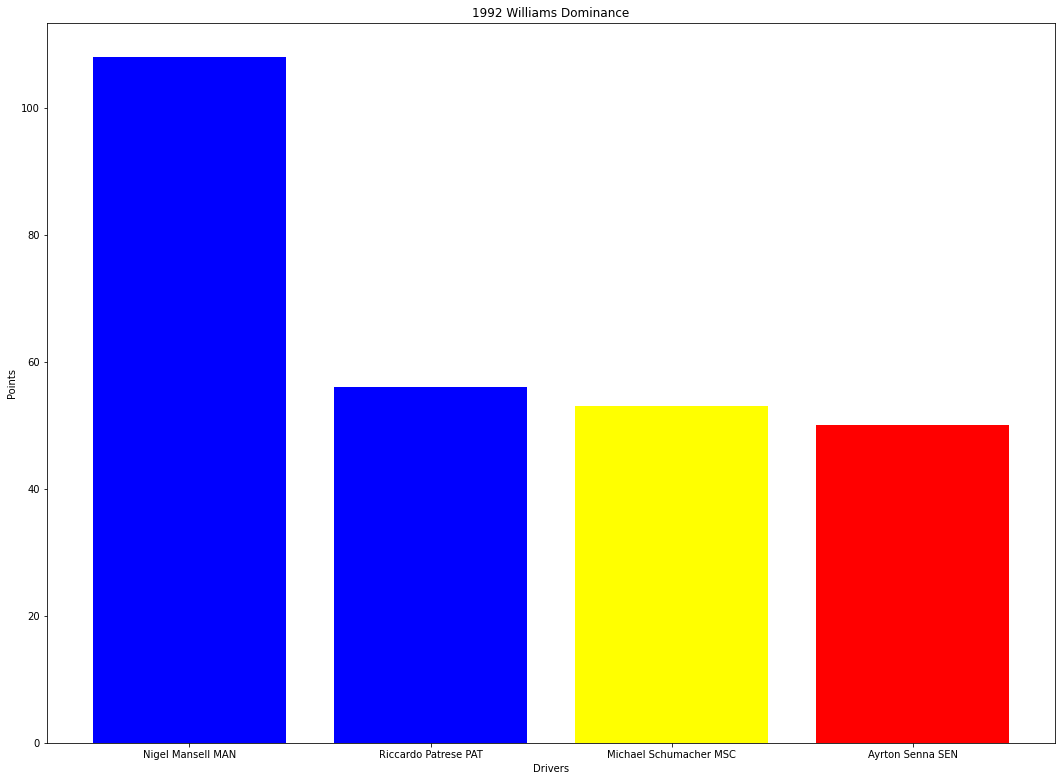

In [14]:
# Plotting top scorers of 1992

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.set_size_inches(14,10)
ax.bar(williams["Driver"].loc[williams["Year"] == 1992], williams["PTS"].loc[williams["Year"] == 1992], 
       color=["blue", "blue", "yellow", "red"])
ax.set_title("1992 Williams Dominance")
plt.xlabel("Drivers")
plt.ylabel("Points")
plt.show()

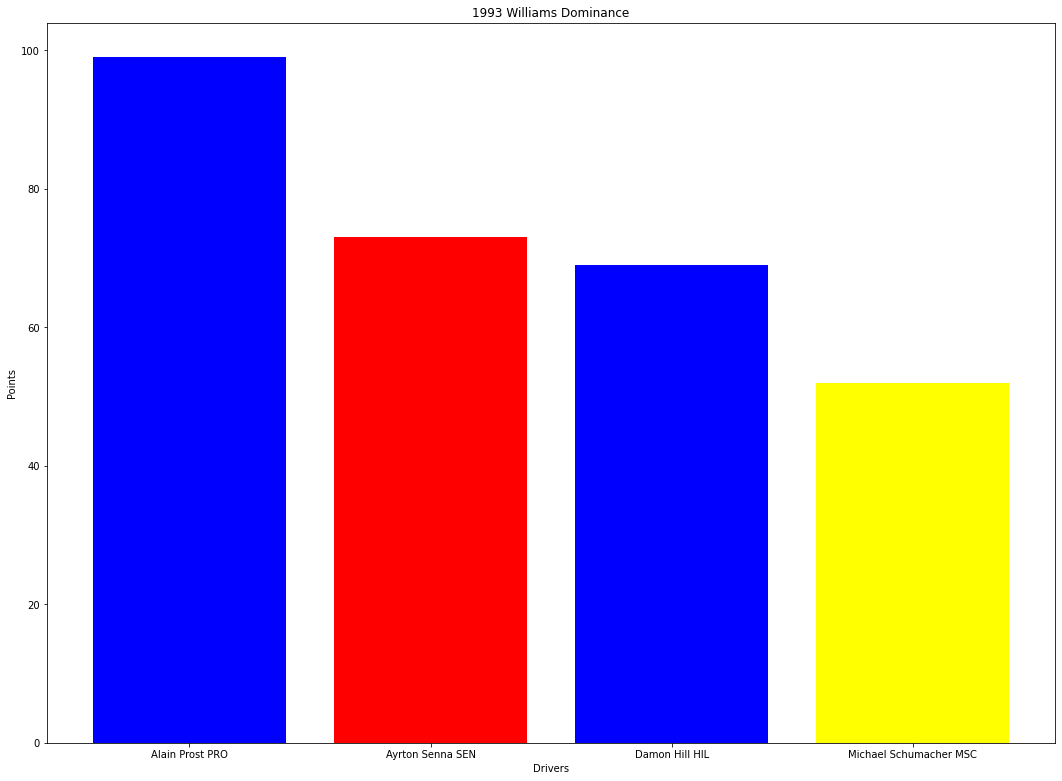

In [15]:
# Plotting top scorers of 1993

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.set_size_inches(14,10)
ax.bar(williams["Driver"].loc[williams["Year"] == 1993], williams["PTS"].loc[williams["Year"] == 1993], 
       color=["blue", "red", "blue", "yellow"])
ax.set_title("1993 Williams Dominance")
plt.xlabel("Drivers")
plt.ylabel("Points")
plt.show()

'92 was a massacre: the FW14B led the active suspension to a state-of-art, giving Nigel Mansell his only yet long desired F1 crown. '93 saw the challenge of a well-built yet engine-underpowered Mclaren. However, '94 saw an amazing fight with Benetton's Michael Schumacher, which had the suspicion (never proved and probably false) of being an illegal car.

Let's check the WDC standings for 1994 now.

In [16]:
drivers_94 = wdc.query("Year == 1994 and Car in ('Williams Renault', 'Benetton Ford')")

drivers_94

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
962,962,1,Michael Schumacher MSC,GER,Benetton Ford,92.0,1994
963,963,2,Damon Hill HIL,GBR,Williams Renault,91.0,1994
969,969,8,David Coulthard COU,GBR,Williams Renault,14.0,1994
970,970,9,Nigel Mansell MAN,GBR,Williams Renault,13.0,1994
971,971,10,Jos Verstappen VER,NED,Benetton Ford,10.0,1994


This alone could be sufficient to show why 1994 was a crazy year: Schumacher and Damon Hill were, for their respective teams, responsible for almost 90% of total points that season. Considering the injury and later sacking of Benetton's J. J. Lehto, the 2-race suspension and later disqualification of another GP for Schumacher, and Williams trading Coulthard and Mansell on the cockpit left out by Senna, they were lucky they had such fine drivers on the lead role.

Because of Schumacher's penalties and specially the win of Nigel Mansell at the season finale, when the title was decided on a crash between the main competitors in favour of the Benetton driver, the atypical year of 1994 saw again the 3rd of five WCC crowns achieved by Williams in that decade.

Let's plot it on the bar chart.

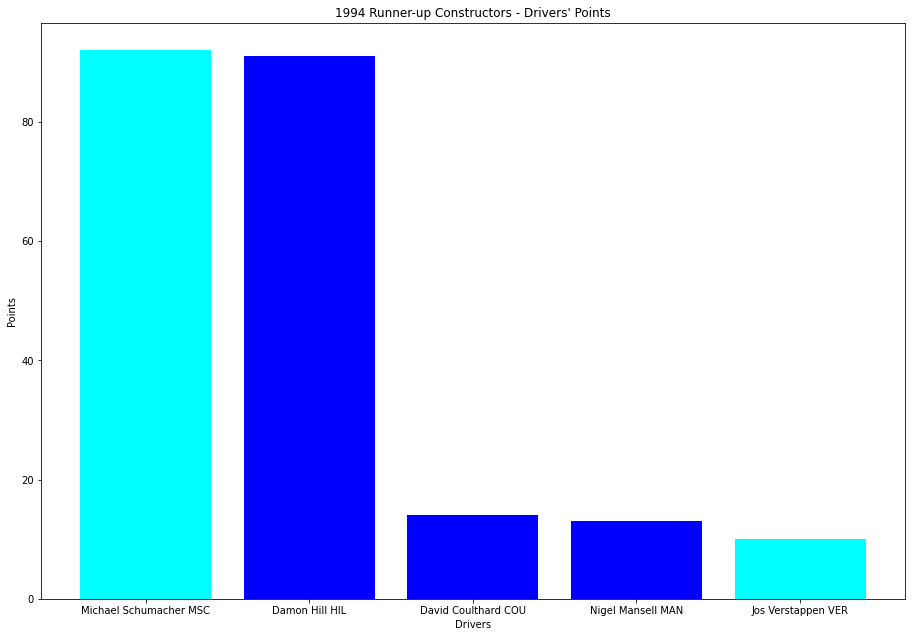

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.set_size_inches(12, 8)
ax.bar(drivers_94["Driver"], drivers_94["PTS"], 
       color=["cyan", "blue", "blue", "blue", "cyan"])
ax.set_title("1994 Runner-up Constructors - Drivers' Points")
plt.xlabel("Drivers")
plt.ylabel("Points")
plt.show()

## 1986 Season

1986 is an unforgettable year for F1, inside and outside the track. 1986 was the year that changed forever the life of Frank Williams, founder and Team Principal of the Williams team. He suffered injuries after a car accident near the circuit of Paul Ricard, and remained tetraplegic. 

At the track, Ayrton Senna, in his second year at Lotus, was winning races and starting to dream with the WDC crown. However, the true remarkable forces of that year were the Williams' drivers: Nelson Piquet (at the time, a double World Champion) and Nigel Mansell, who had just came from Lotus. Frank Williams assured Piquet he would receive no.1 status in the team, but now that he was away for the while, Mansell had other plans and so did the team. The fight raged on the whole season.

However, neither of them took the crown at the end of the year. With an inferior McLaren, Alain Prost won back-to-back titles, winning in a dramatic fashion at the season finale in Adelaide, after Mansell suffering a puncture that caused his retirement and Piquet pitting for new tyres as a precautionary measure.

Let's check the data for the top 4 drivers of 1986.

In [19]:
drivers_86 = wdc.query("Pos in ('1', '2','3', '4') & Year == 1986")

drivers_86

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
793,793,1,Alain Prost PRO,FRA,McLaren TAG,72.0,1986
794,794,2,Nigel Mansell MAN,GBR,Williams Honda,70.0,1986
795,795,3,Nelson Piquet PIQ,BRA,Williams Honda,69.0,1986
796,796,4,Ayrton Senna SEN,BRA,Lotus Renault,55.0,1986


We can see that 1986 was indeed a very balanced year: only three points separating the top three, and Senna is only a win and a half away from them (a win was 9 points at the time). 

Had one of the Williams' drivers been given the no.1 status, they would have surely conquered both titles that year. Which happened in 1987, with Piquet taking his 3rd and final WDC title.

Let's visualize the 1986 top scorers on the bar chart.

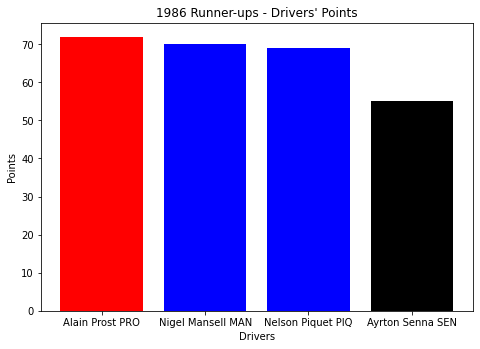

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(drivers_86["Driver"], drivers_86["PTS"],
      color = ["red", "blue", "blue", "black"])
plt.xlabel("Drivers")
plt.ylabel("Points")
ax.set_title("1986 Runner-ups - Drivers' Points")
plt.show()

Wow! The bar chart does make it look like a tight dispute indeed!

## 1981-1983 Seasons

I decided to address these seasons in a single analysis, since they are in a similar context. These years saw the height of the FISA-FOCA war, that is, the political dispute between FISA, the nowadays extinct sportive branch of FIA, led by Jean-Marie Balestre; and the Formula One Constructors Association, led by Bernie Ecclestone, an entity that initially embodied only most of the English constructors, and later even Ferrari joined them.

Also, two revolutions were happening here: ground effect (banned after 1982) and the turbo-charged engines — fast yet unrealiable. So, we can expect a lot of retirements in this era.

Let's start by the easiest: 1981. '81 saw a dogfight inside — guess who? — the Williams team yet again. This time, between Alan Jones, the previous year's WDC winner; and his teammate, Carlos Reutemann, who decided to go over his contract of being the no.2 driver of the team. That allowed Nelson Piquet in his Brabham to rise and take his 1st crown, although by a very slight margin. 

Let's pick again the top 4 scorers of that year.

In [37]:
drivers_81 = wdc.query("Year == 1981 & Pos in ('1', '2', '3', '4')")

drivers_81

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
686,686,1,Nelson Piquet PIQ,BRA,Brabham Ford,50.0,1981
687,687,2,Carlos Reutemann REU,ARG,Williams Ford,49.0,1981
688,688,3,Alan Jones JON,AUS,Williams Ford,46.0,1981
689,689,4,Jacques Laffite LAF,FRA,Ligier Matra,44.0,1981


Whoa! 4 drivers separated by 6 points? How many drivers got more than 40 points them?

In [38]:
drivers_81 = wdc.query("Year == 1981 & PTS >= 40")

drivers_81

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
686,686,1,Nelson Piquet PIQ,BRA,Brabham Ford,50.0,1981
687,687,2,Carlos Reutemann REU,ARG,Williams Ford,49.0,1981
688,688,3,Alan Jones JON,AUS,Williams Ford,46.0,1981
689,689,4,Jacques Laffite LAF,FRA,Ligier Matra,44.0,1981
690,690,5,Alain Prost PRO,FRA,Renault,43.0,1981


5 drivers! Wow! Clearly, if the Williams team, again, had prioritized one of their drivers, things could have been much different. 

Let's plot it on the bar chart.

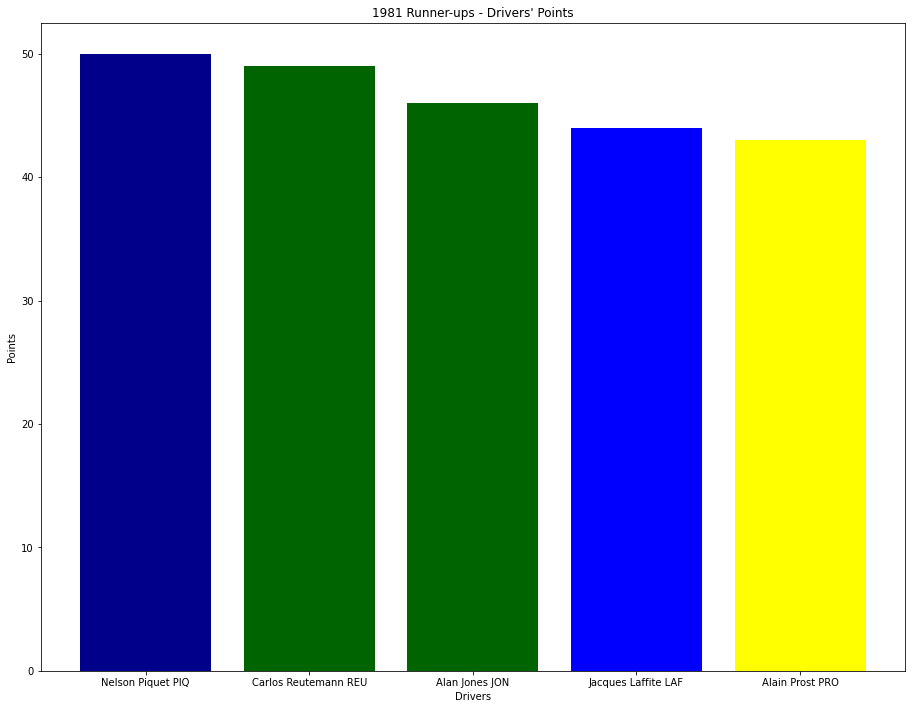

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

fig.set_size_inches(12,9)

ax.bar(drivers_81["Driver"], drivers_81["PTS"],
      color = ["darkblue", "darkgreen", "darkgreen", "blue", "yellow"])
plt.xlabel("Drivers")
plt.ylabel("Points")
ax.set_title("1981 Runner-ups - Drivers' Points")
plt.show()

I must admit I'm loving these bar charts!

Anyway, let's move on. 1982 was a very atypical year. Even a driver strike broke out in the season opener at Kyalami. Also, two fatal accidents took the lives of Gilles Villeneuve and Riccardo Paletti, quite similarly to 1994; but also, Ferrari's Didier Pironi also sustained injuries at the German Grand Prix that ended his career. So, the result was: with a single win to his name, Williams' Keke Rosberg won the WDC, while Ferrari took the Constructors win.

Let's query the data and pick the top 4 scorers.

In [42]:
drivers_82 = wdc.query("Year == 1982 & Pos in ('1', '2', '3', '4')")

drivers_82

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
707,707,1,Keke Rosberg ROS,FIN,Williams Ford,44.0,1982
708,708,2,Didier Pironi PIR,FRA,Ferrari,39.0,1982
709,709,2,John Watson WAT,GBR,McLaren Ford,39.0,1982
710,710,4,Alain Prost PRO,FRA,Renault,34.0,1982


Again, four drivers separated by ten points. Can we find more runner-ups?

In [43]:
drivers_82 = wdc.query("Year == 1982 & PTS >= 30")

drivers_82

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
707,707,1,Keke Rosberg ROS,FIN,Williams Ford,44.0,1982
708,708,2,Didier Pironi PIR,FRA,Ferrari,39.0,1982
709,709,2,John Watson WAT,GBR,McLaren Ford,39.0,1982
710,710,4,Alain Prost PRO,FRA,Renault,34.0,1982
711,711,5,Niki Lauda LAU,AUT,McLaren Ford,30.0,1982


Let's take a closer look: even after retiring from the sport 4 races before the end of the season, Pironi was 2nd place at the end! Close call! Actually, Rosberg holds the record for the WDC winner with the smallest amount of  points on history.

Let's put in on the bar chart! It's gonna be quite a close call.

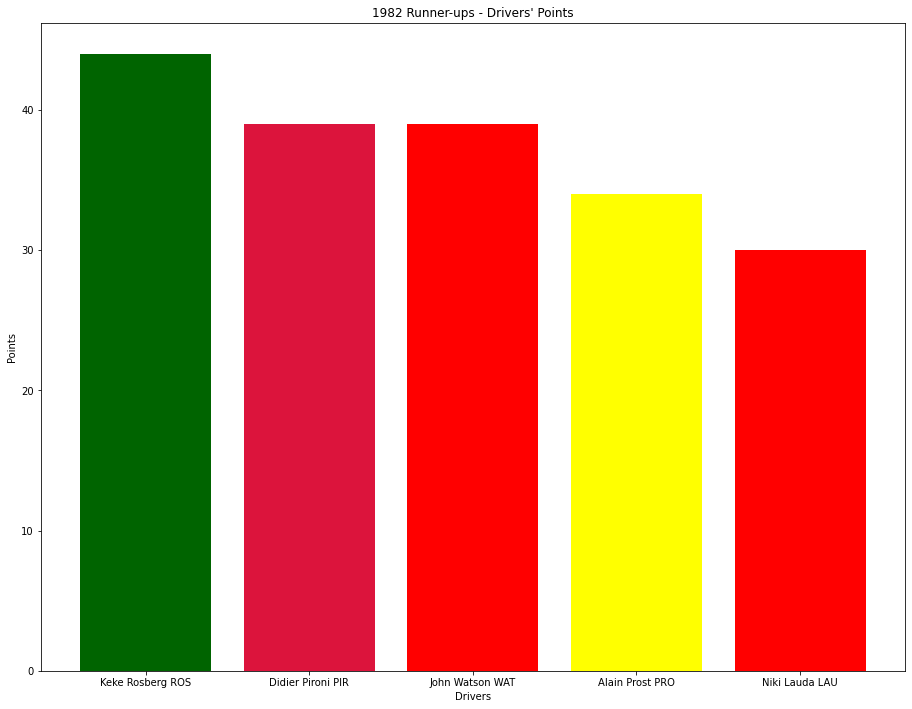

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

fig.set_size_inches(12,9)

ax.bar(drivers_82["Driver"], drivers_82["PTS"],
      color = ["darkgreen", "crimson", "red", "yellow", "red"])
plt.xlabel("Drivers")
plt.ylabel("Points")
ax.set_title("1982 Runner-ups - Drivers' Points")
plt.show()

Last, we have 1983. Let's query the data and see what we have on the top 4 scorers.

In [45]:
drivers_83 = wdc.query("Year == 1983 & Pos in ('1', '2', '3', '4')")

drivers_83

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
733,733,1,Nelson Piquet PIQ,BRA,Brabham BMW,59.0,1983
734,734,2,Alain Prost PRO,FRA,Renault,57.0,1983
735,735,3,Rene Arnoux ARN,FRA,Ferrari,49.0,1983
736,736,4,Patrick Tambay TAM,FRA,Ferrari,40.0,1983


We can see again that Ferrari had both a very consistently-scoring car and driver duo, yet again did not win the title.

Let's include both Renault and Brabham drivers in this query.

In [46]:
drivers_83 = wdc.query("Year == 1983 & Car in ('Ferrari', 'Renault', 'Brabham BMW')")

drivers_83

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
733,733,1,Nelson Piquet PIQ,BRA,Brabham BMW,59.0,1983
734,734,2,Alain Prost PRO,FRA,Renault,57.0,1983
735,735,3,Rene Arnoux ARN,FRA,Ferrari,49.0,1983
736,736,4,Patrick Tambay TAM,FRA,Ferrari,40.0,1983
739,739,7,Eddie Cheever CHE,USA,Renault,22.0,1983
741,741,9,Riccardo Patrese PAT,ITA,Brabham BMW,13.0,1983


Indeed, Ferrari was very consistent overall, but not good enough to take both crowns. 

Let's visualize it better on the bar chart!

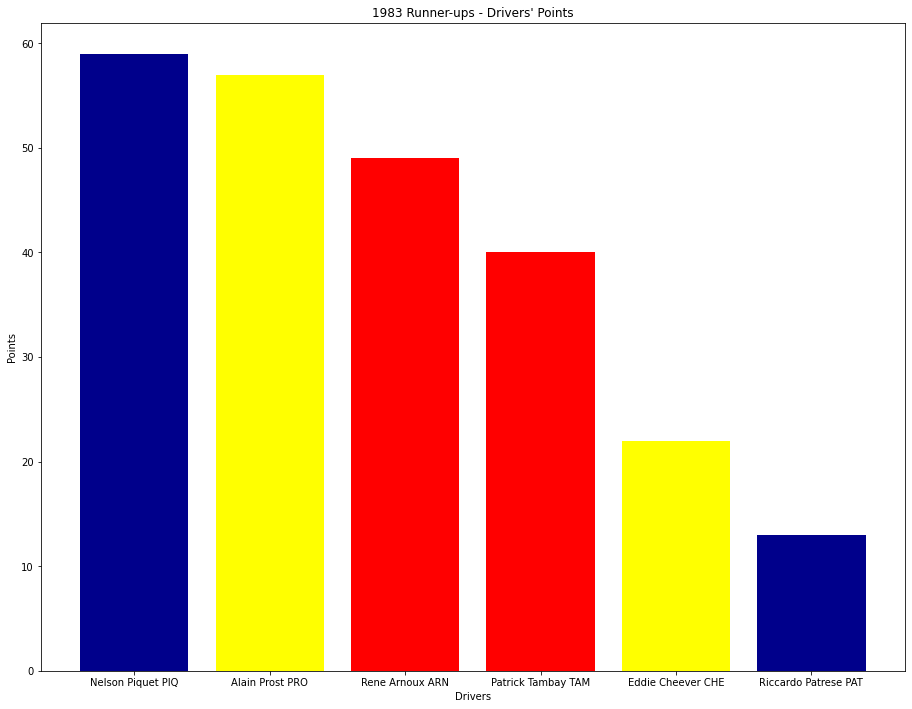

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

fig.set_size_inches(12,9)

ax.bar(drivers_83["Driver"], drivers_83["PTS"],
      color = ["darkblue", "yellow", "red", "red", "yellow", "darkblue"])
plt.xlabel("Drivers")
plt.ylabel("Points")
ax.set_title("1983 Runner-ups - Drivers' Points")
plt.show()

## 1976 Season

The season that inspired a whole movie! Indeed, it was a fantastic one! Let's look at the top 4 scorers and see what we got.

In [48]:
drivers_76 = wdc.query("Year == 1976 & Pos in ('1', '2', '3', '4')")

drivers_76

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
582,582,1,James Hunt HUN,GBR,McLaren Ford,69.0,1976
583,583,2,Niki Lauda LAU,AUT,Ferrari,68.0,1976
584,584,3,Jody Scheckter SCH,RSA,Tyrrell Ford,49.0,1976
585,585,4,Patrick Depailler DEP,FRA,Tyrrell Ford,39.0,1976


This time, the runner-ups are not only in the top 4. '76 is most remember by the most memorable of the Ferrari-Mclaren fights: Hunt vs Lauda.

Let's query for the drivers of these two teams.

In [50]:
drivers_76 = wdc.query("Year == 1976 & Car in ('Ferrari', 'McLaren Ford')")

drivers_76

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
582,582,1,James Hunt HUN,GBR,McLaren Ford,69.0,1976
583,583,2,Niki Lauda LAU,AUT,Ferrari,68.0,1976
586,586,5,Clay Regazzoni REG,SUI,Ferrari,31.0,1976
590,590,9,Jochen Mass MAS,GER,McLaren Ford,19.0,1976
597,597,16,Carlos Reutemann REU,ARG,Ferrari,3.0,1976


Although the machinery is said to be very similar, Ferrari did scored more consistently overall. And even with Lauda's accident, which caused him to be absent for more 2 Grand Prix, he lost the championship by a single point.

What could have happened if he had raced in Fuji... Well, all that's left for us is the bar chart plot.

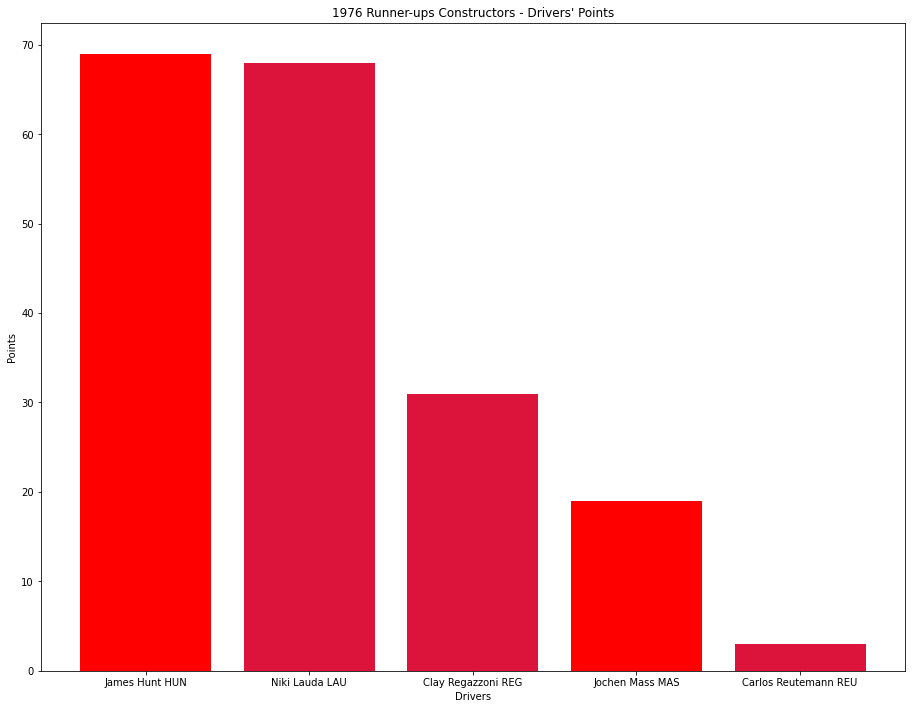

In [52]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

fig.set_size_inches(12,9)

ax.bar(drivers_76["Driver"], drivers_76["PTS"],
      color = ["red", "crimson", "crimson", "red", "crimson"])
plt.xlabel("Drivers")
plt.ylabel("Points")
ax.set_title("1976 Runner-ups Constructors - Drivers' Points")
plt.show()

# 1973 Season

1973 was the 3rd and final crown of Tyrrell's Jackie Stewart, but the WCC was won by Lotus.

Let's query the top 4 again.

In [53]:
drivers_73 = wdc.query("Year == 1973 & Pos in ('1', '2', '3', '4')")

drivers_73

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
520,520,1,Jackie Stewart STE,GBR,Tyrrell Ford,71.0,1973
521,521,2,Emerson Fittipaldi FIT,BRA,Lotus Ford,55.0,1973
522,522,3,Ronnie Peterson PET,SWE,Lotus Ford,52.0,1973
523,523,4,Francois Cevert CEV,FRA,Tyrrell Ford,47.0,1973


This time, we have both teams very close to each other. What happened is that Cevert, Tyrrell's no.2 and probably a future World Champion, died during qualifying for the season finale at Watkins Glen (where he also won his only Grand Prix). Tyrrell then decided to not race the next day, allowing Lotus to score points and take that title. 

Let's plot it on the bar chart.

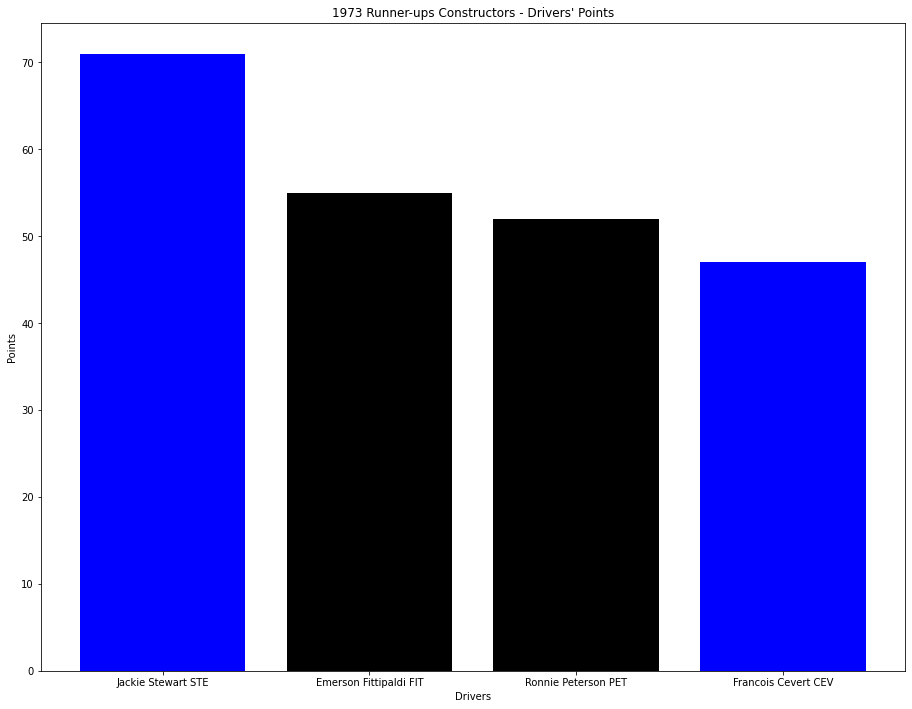

In [54]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

fig.set_size_inches(12,9)

ax.bar(drivers_73["Driver"], drivers_73["PTS"],
      color = ["blue", "black", "black", "blue"])
plt.xlabel("Drivers")
plt.ylabel("Points")
ax.set_title("1973 Runner-ups Constructors - Drivers' Points")
plt.show()

We can see that Stewart won the title with ease. Probably, they would have allowed Cevert to take another win that weekend.

# 1958 Season

The first season to hold a World Constructions Championship dispute. Ferrari's Mike Hawthorn took the crown, but Vanwall was the best car. 

Let's query the data for the top 4 scoring drivers.

In [55]:
drivers_58 = wdc.query("Year == 1958 & Pos in ('1', '2', '3', '4')")

drivers_58

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
182,182,1,Mike Hawthorn HAW,GBR,Ferrari,42.0,1958
183,183,2,Stirling Moss MOS,GBR,Vanwall,41.0,1958
184,184,3,Tony Brooks BRO,GBR,Vanwall,24.0,1958
185,185,4,Roy Salvadori SAL,GBR,Cooper Climax,15.0,1958


Wow! Where's the other Ferrari driver in these standings? Let's make another query for that.

In [56]:
drivers_58 = wdc.query("Year == 1958 & Car in ('Ferrari', 'Vanwall')")

drivers_58

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
182,182,1,Mike Hawthorn HAW,GBR,Ferrari,42.0,1958
183,183,2,Stirling Moss MOS,GBR,Vanwall,41.0,1958
184,184,3,Tony Brooks BRO,GBR,Vanwall,24.0,1958
186,186,5,Peter Collins COL,GBR,Ferrari,14.0,1958
189,189,7,Luigi Musso MUS,ITA,Ferrari,12.0,1958
190,190,9,Stuart Lewis-Evans LEW,GBR,Vanwall,11.0,1958
191,191,10,Phil Hill HIL,USA,Ferrari,9.0,1958
193,193,10,Wolfgang von Trips VON,GER,Ferrari,9.0,1958


Ah yeah. The times when teams had many, many drivers. 1958 saw the passing of two Ferrari drivers as well, Musso and Collins.

Also, let's not forget that Hawthorn took a suspension for the season finale and, in a gentleman's attitude, Moss refused to race, which allowed his Ferrari rival to take the title.

Very balanced championship, and drivers too. But again, sadly, another tragic year.

Let's plot this last query on the bar chart.

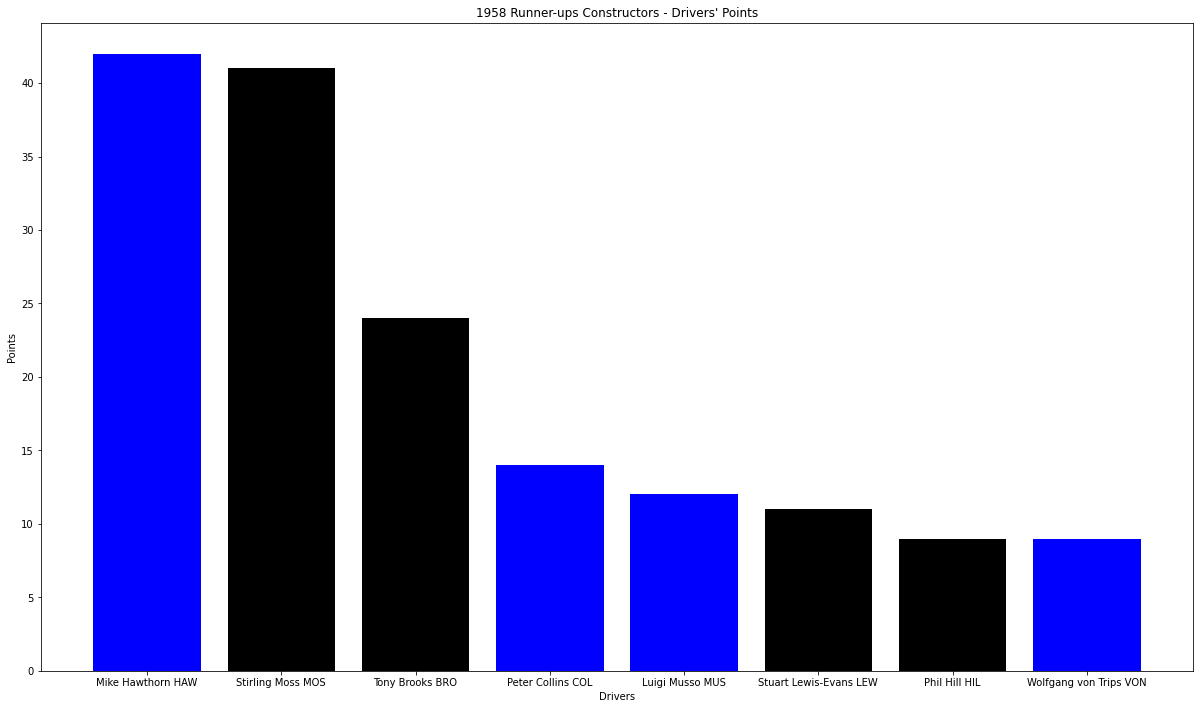

In [58]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

fig.set_size_inches(16,9)

ax.bar(drivers_58["Driver"], drivers_58["PTS"],
      color = ["blue", "black", "black", "blue"])
plt.xlabel("Drivers")
plt.ylabel("Points")
ax.set_title("1958 Runner-ups Constructors - Drivers' Points")
plt.show()